In [1]:
matplotlib inline

In [2]:
%%capture
from analysis import *

Reading data...
Munging data...
Creating resolution fields...
Indexing categories
Filtering data... (grouping)
Filtering data... (aggregating)
Updating filtered data...
Binning...
ready


# Crimes per Police District
Southern has the highest number incidents and charges booked and Richmond has the least, implying that Southern is the least safe district and that Richmond is the safest.
Each incident can result in zero or more charges being booked; Tenderloin has the highest ratio of charges to incidents, showing that each offendent was charge with multiple violations, whereas central has the lowest ratio, indiciating that only occasionly are more than one charge filed.

## Figure 1: Police Districts

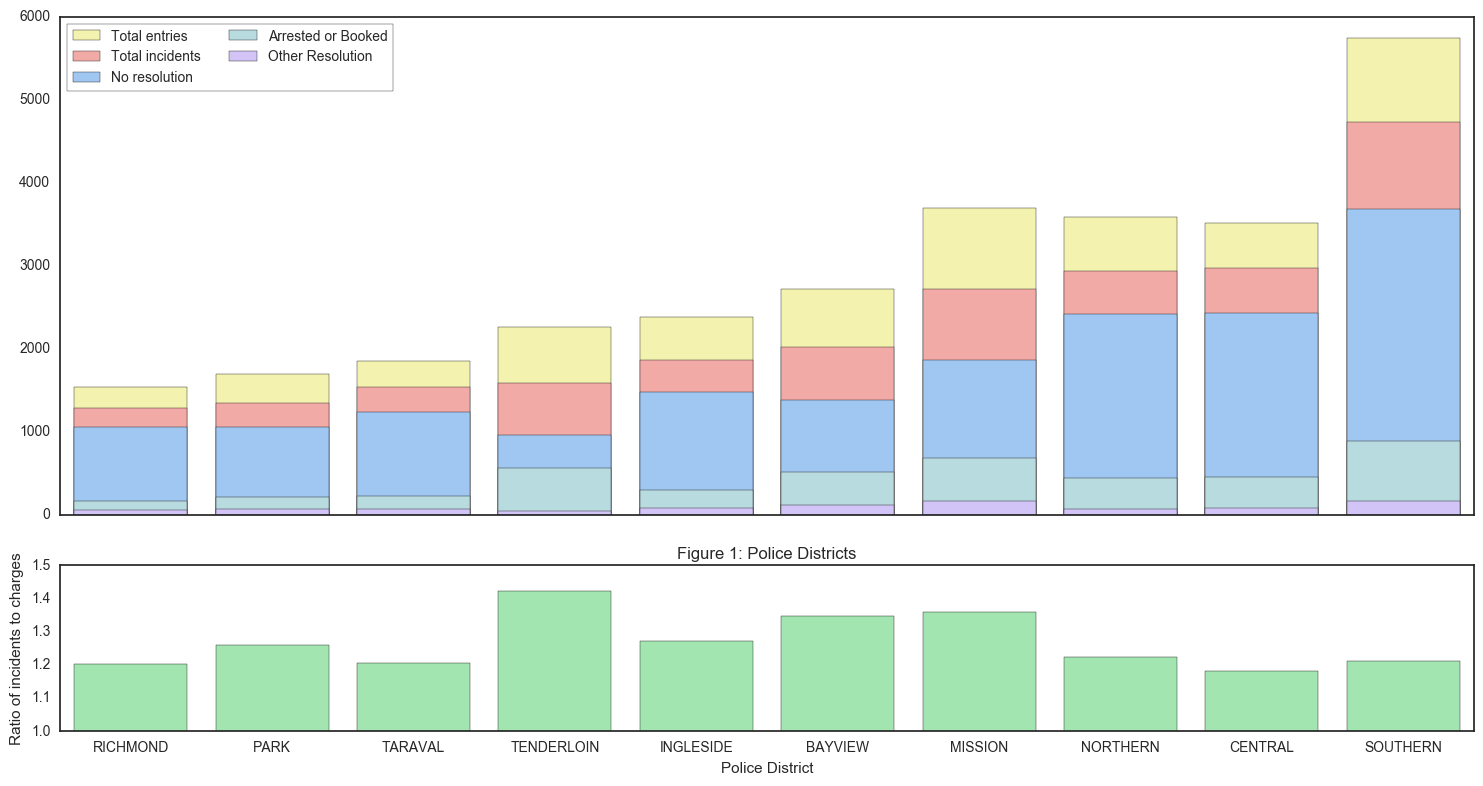

In [35]:
from matplotlib import gridspec
from matplotlib import pyplot as plt
districts = pandas.DataFrame({
    "Charges": sanfran.groupby("PdDistrict").count()["PdId"],
    "Incidents": filteredData.groupby("PdDistrict").count()["PdId"]
})
districts["Ratio"] = districts["Charges"] / districts["Incidents"]
districts = districts.sort_values("Incidents")
districts.style.format({"Ratio":"{:.0}"})

f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 8), sharex=True, squeeze=True, gridspec_kw={'height_ratios': [3, 1]},)
#f = plt.figure(figsize=(15, 10))
#gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
#ax1 = plt.subplot(gs[0])
#ax2 = plt.subplot(gs[1], sharex=ax1)

filteredData['No Resolution'] = pandas.eval("~filteredData['Arrested or Booked'] & ~filteredData['Other Resolution']")

    
thedata = filteredData[["Arrested or Booked","Other Resolution","No Resolution","PdDistrict"]].groupby("PdDistrict").sum()
thedata = thedata.sort_values("Arrested or Booked")
thedata["Charges"] = districts["Charges"]
thedata["Incidents"] = districts["Incidents"]

sns.set_color_codes("pastel")
#plt.title("Figure 1: Police Districts", loc="")

plot4 = sns.countplot(x="PdDistrict", data=sanfran, color="y", label="Total entries", order=districts.index, ax=ax1)
#sns.set_color_codes("muted")
#plot5 = sns.countplot(x="PdDistrict", data=filteredData, color="b", label="Number of Incidents", order=districts.index, ax=ax1)
#sns.despine(left=True, bottom=True)
#sns.color_palette("husl", 8)
#sns.set_color_codes("muted")
sns.barplot(data=thedata,x=thedata.index, y="Incidents", order=districts.index, ax=ax1, color="r", label="Total incidents");
sns.barplot(data=thedata,x=thedata.index, y="No Resolution", order=districts.index, ax=ax1, color="b", label="No resolution");
#sns.set_color_codes("deep")
sns.barplot(data=thedata,x=thedata.index, y="Arrested or Booked", order=districts.index, ax=ax1, color="c", label="Arrested or Booked");
sns.barplot(data=thedata,x=thedata.index, y="Other Resolution", order=districts.index, ax=ax1, color="m", label="Other Resolution");

sns.barplot(data=districts,x=districts.index, y="Ratio", order=districts.index, ax=ax2, color="g");

ax1.legend(ncol=2, loc="upper left", frameon=True);
ax1.set(ylabel="", xlabel="");
ax2.set(ylabel="Ratio of incidents to charges", xlabel="Police District", ylim=[1.0,1.5]);
plt.tight_layout()

# Location of crimes

From the below figure, it can be seen the boundaries and size of the various police districts and also the areas with the highest densities of crime. Tenderloin, Central, Nothern and Richmond have the higest densities. Tenderloin is the smallest district but has a large propotion of recorded crimes.

## Figure 2: Location of crimes and districts

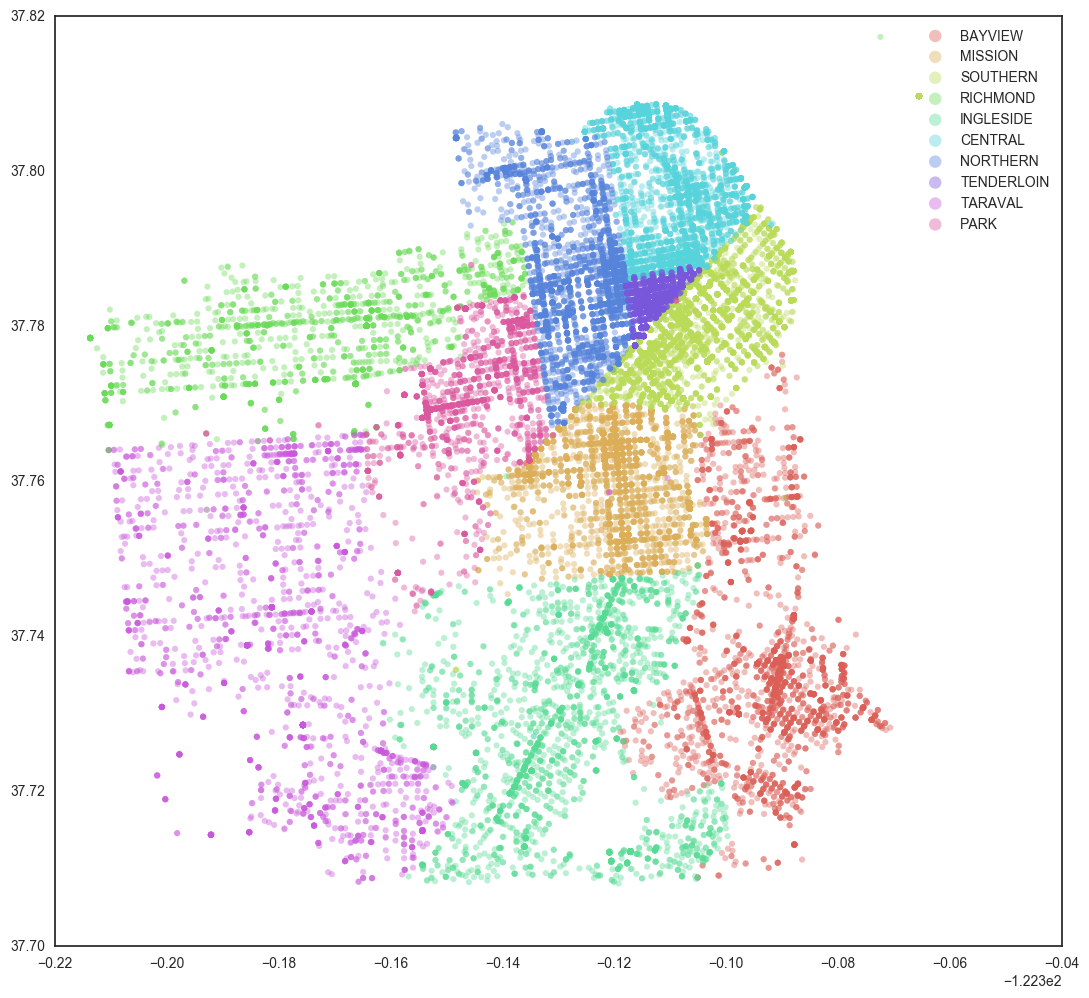

In [26]:
from matplotlib import colors
zoomfig=plt.figure(figsize=(13,12))
distColors = colors.ListedColormap(sns.color_palette("hls", 10))
plt.style.use('seaborn-white')


from six import iteritems
unfilled_markers = [m for m, func in iteritems(Line2D.markers)]
markerlist = list(Line2D.filled_markers) + list(unfilled_markers);

for idx, dist in enumerate(sanfran["PdDistrict"].unique()):
    plt.scatter(x="X",y="Y",data=sanfran[sanfran.PdDistrict==dist], alpha=0.4, c=distColors(districtMap[dist]), label=dist, edgecolors='none')
ax = plt.axis((-122.52,-122.34, 37.70, 37.82));
plt.legend(markerscale=2)
plt.show()

## Figure 3: Central and Tenderloin Districts

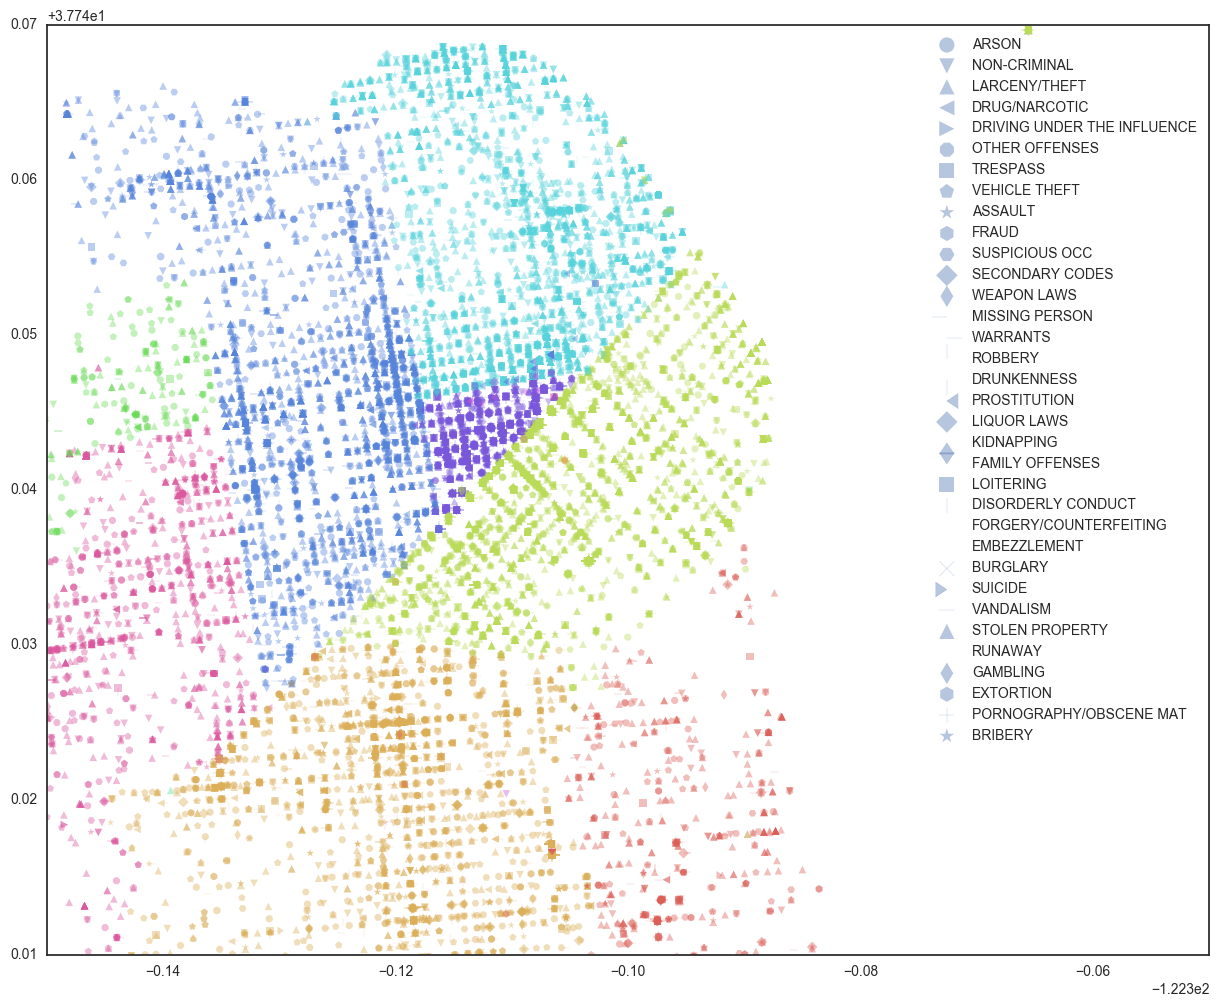

In [31]:
zoomfig=plt.figure(figsize=(15,12))
plt.style.use('seaborn-white')
distColors = colors.ListedColormap(sns.color_palette("hls", 10))

from six import iteritems
unfilled_markers = [m for m, func in iteritems(Line2D.markers)]
markerlist = list(Line2D.filled_markers) + list(unfilled_markers);

for idx, cat in enumerate(sanfran["Category"].unique()):
    plt.scatter(x="X",y="Y",data=sanfran[sanfran.Category==cat], alpha=0.4, c=sanfran[sanfran.Category==cat]["DistrictNum"], cmap=distColors, marker=markerlist[idx], label=cat, edgecolors='none', s=30);
plt.axis((-122.45,-122.35, 37.75, 37.81));
plt.legend(markerscale=2);
plt.show();

## Figure 4: Categories of Crimes Committed

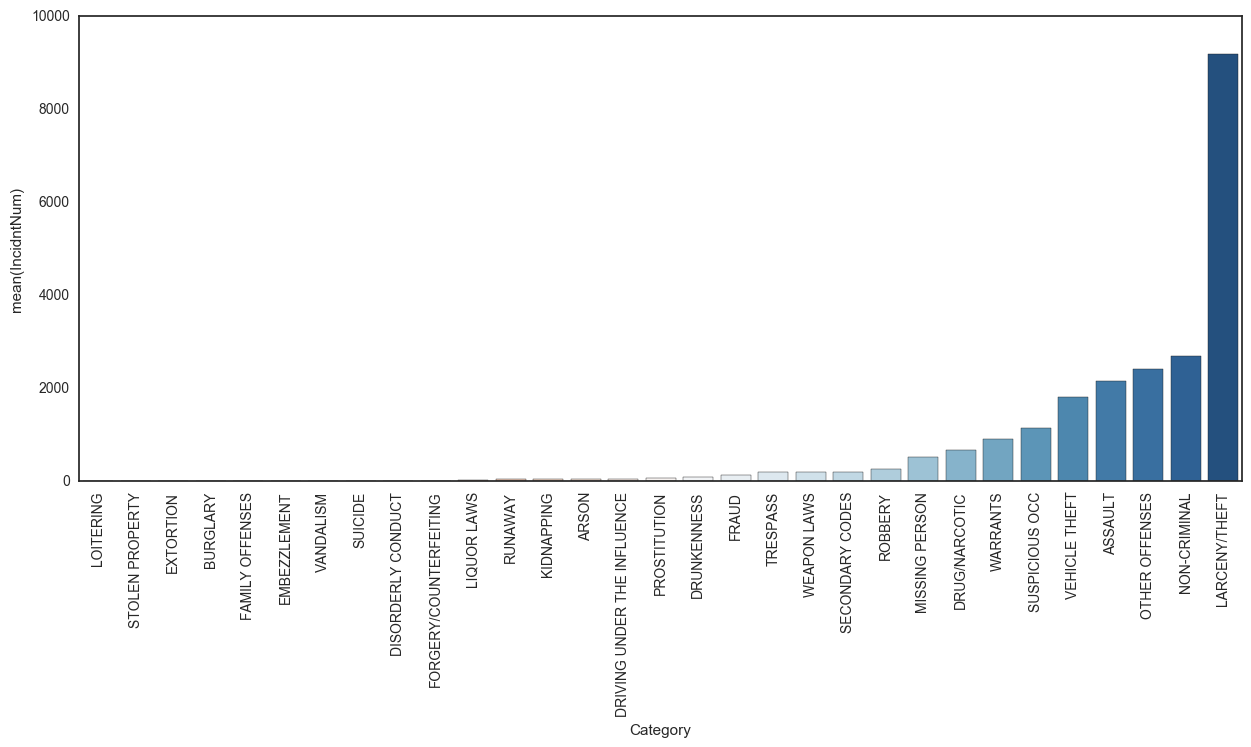

In [36]:
sns.set_color_codes("dark")
by_cat = filteredData.groupby("Category").count()
by_cat = by_cat.sort_values("IncidntNum")
plt.figure(figsize=(15,6))
plt.xticks(rotation='vertical')
#ax = sns.countplot(filteredData["Category"])
ax = sns.barplot(data=by_cat, y="IncidntNum", x=by_cat.index, palette=sns.color_palette("RdBu", n_colors=32))
#total = float(len(filteredData)) # one person per row 
#for p in ax.patches:
#    ax.text(p.get_x(), p.get_height()+ 4, '%1.2f'%1)

Finally Figure 4 shows that Larceny/Theft is the highest category of crime and this is reflected with the number of markers shown in the zoom in Figure 3. Larceny/Theft and assualt can be easily seen in high numbers in these high crime density areas.